In [1]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.0em;
line-height:1.6em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: 1em;
text-align:center;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.2em;
line-height:1.2em;
padding-left:1em;
padding-right:3em;
}
</style>
""")

# It's all about Word2Vec

<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_1.gif" 
align="middle" alt="Image_1_1" data-canonical-src="" style="width:90%;height:90%">

```
1. Why do we need Word2Vec?

2. What is Word2Vec?

3. Architecture of Word2Vec

4. Components of Word2Vec
    
    4.1 Vocabulary Builder
    
    4.2 Context Builder
    
    4.3 One-hot encoding
    
    4.4 Skip-Gram
    
    4.5 Continuous Bag of Words

5. Math behind Word2Vec

    5.1 Structure Highlights
    
    5.2 Small math example
    
    5.3 Softmax function

    5.4 Error Function

6. Understanding of T-SNE 
    
7. Let's start hands on session


```

## Why do we need Word2Vec?

* Semantics is important...!


* Lexical Semantics and Distributional Semantics


* We are focusing of Distributional Semantics


* Computer cannot do computations on strings


* Strings don’t hold much explicit information themselves.



__Facts:__


* Is Word2Vec having Deep Neural Networks? The answer is: __NO__ 


* It's has only 3 layers...!

## What is Word2Vec?

* Word2Vec is the representation of words in numerical format. 


* Words Vectors are usually dense vector representations


* It generates high-dimensional vector space for words. 



## Architecture of Word2Vec



<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_2.png" 
align="middle" alt="Image_1_2" data-canonical-src="" style="width:80%;height:80%">

<p style="text-align:center;">Image credit goes to [Xin Rong](https://docs.google.com/presentation/d/1yQWN1CDWLzxGeIAvnGgDsIJr5xmy4dB0VmHFKkLiibo/pub?start=false&loop=false&delayms=3000&slide=id.p)</p>

<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_3.png" 
align="middle" alt="Image_1_3" data-canonical-src="" style="width:100%;height:100%">

<p style="text-align:center;">Image credit goes to [Xin Rong](https://docs.google.com/presentation/d/1yQWN1CDWLzxGeIAvnGgDsIJr5xmy4dB0VmHFKkLiibo/pub?start=false&loop=false&delayms=3000&slide=id.p)</p>

## Main Logic behind Word2Vec

    

<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_4.png" 
align="middle" alt="Image_1_4" data-canonical-src="" style="width:100%;height:100%">

<p style="text-align:center;">Image credit goes to [Xin Rong](https://docs.google.com/presentation/d/1yQWN1CDWLzxGeIAvnGgDsIJr5xmy4dB0VmHFKkLiibo/pub?start=false&loop=false&delayms=3000&slide=id.p)</p>


## Components of Word2Vec

### Vocabulary Builder

* It takes input in form of raw sentences and generate vocabulary in form of unique words from sentence.

```
Example: he is a boy

```
* Then Vocabulary Builder builds the vocabulary of four words

* In gensim, Vocabulary builder object has word index and its count.

Populating the interactive namespace from numpy and matplotlib
Word2Vec(vocab=14, size=100, alpha=0.025)
['second', 'word2vec', 'one', 'is', 'the', 'and', 'yet', 'more', 'another', 'first', 'for', 'final', 'this', 'sentence']
[ 3.4526172e-03 -3.6253980e-03 -4.8894957e-03  3.5371939e-03
  1.0136300e-03  2.2728480e-03 -2.1301052e-03  3.5644567e-03
 -2.3860077e-03  4.6696239e-03  1.5803293e-03 -3.1931193e-03
 -4.3240076e-04 -4.2847716e-03 -2.7902359e-03  3.7338415e-03
  6.1714120e-04 -1.6436372e-03 -1.1424959e-03  2.2812276e-03
  4.4672098e-03  8.6390093e-04 -4.5589181e-03  3.5794789e-03
 -3.4539844e-03  2.3305055e-03 -3.5529833e-03 -8.1086287e-04
 -2.4151730e-03 -4.3379716e-03  1.1760124e-03  7.6709531e-04
  2.7169310e-04 -9.0264360e-04  4.2996504e-03  9.4277778e-04
 -2.5867394e-03  1.3064774e-03  1.3213562e-03  3.3167421e-03
  5.5965680e-05 -4.0650405e-03 -1.1062450e-03 -2.5852877e-03
 -1.2720975e-03 -3.9935028e-03  3.3815100e-03 -2.5038947e-03
 -1.6694048e-03  4.4343816e-03  4.0695621e

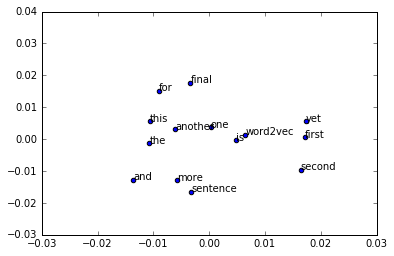

In [2]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
%pylab inline
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1,size=100)
#model = gensim.models.Word2Vec(sentences, size=150, window=10, min_count=2, workers=10)

# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])



# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

### Context Builder

    

* __Context Builder__ is kind of sliding window. It is specified by number and direction


* It's kind of n-gram algorithms.


* It uses output of Vocabulary builder as input.


* Context builder generate word pairs. 


* Note that: If the word is at the beginning or ending of sentence, the window ignores the outer words

<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_5.png" 
align="middle" alt="Image_1_5" data-canonical-src="" style="width:100%;height:100%">

In [3]:
# raw sentences is a list of sentences.
corpus_raw = 'he is the king. the king is royal. she is the royal queen' 
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

print('------------Sentences----------')
print(sentences)

data = []
WINDOW_SIZE = 2
for sentence in sentences:
    print('\n')
    print('-----------Word Pairs-------')
    for word_index, word in enumerate(sentence):
        print ("Word:  "+ word)
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                print ([word + ' ------- '+ nb_word])
                data.append([word, nb_word])
#print('\n')
#print('------------Word Pairs in form of list----------')
#print(data)

------------Sentences----------
[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]


-----------Word Pairs-------
Word:  he
['he ------- is']
['he ------- the']
Word:  is
['is ------- he']
['is ------- the']
['is ------- king']
Word:  the
['the ------- he']
['the ------- is']
['the ------- king']
Word:  king
['king ------- is']
['king ------- the']


-----------Word Pairs-------
Word:  the
['the ------- king']
['the ------- is']
Word:  king
['king ------- the']
['king ------- is']
['king ------- royal']
Word:  is
['is ------- the']
['is ------- king']
['is ------- royal']
Word:  royal
['royal ------- king']
['royal ------- is']


-----------Word Pairs-------
Word:  she
['she ------- is']
['she ------- the']
Word:  is
['is ------- she']
['is ------- the']
['is ------- royal']
Word:  the
['the ------- she']
['the ------- is']
['the ------- royal']
['the ------- queen']
Word:  royal
['royal ------- is']
['royal ------- the']
['royal -----

### One-hot encoding

* Convert categorical data into binary format. 


* If word is present, then value at that word index is 1 and if not then value at that word index is zero

In [4]:
corpus_raw = 'he is the king the king is royal she is the royal queen' 
words = []
for word in corpus_raw.split(' '):
    if word != '.': # because we don't want to treat . as a word
        words.append(word)
print (words)
words = set(words) # so that all duplicate words are removed
print (words)
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp
x_train = [] # input word
y_train = [] # output word
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

['he', 'is', 'the', 'king', 'the', 'king', 'is', 'royal', 'she', 'is', 'the', 'royal', 'queen']
{'is', 'queen', 'king', 'he', 'royal', 'the', 'she'}


In [5]:
print(x_train)

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]]


In [6]:
print(y_train)

[[1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]]


### Continuous Bag of Words (CBOW)

  


* This model tries to predict a word based on its neighbours


* CBOW is learning to predict the word by the context. A context may be single word or multiple word for a given target words

__Example:__ The cat jumped over the puddle.

__Input words or Context words:__ {“The”, “cat”, ’over”, “the’, “puddle”}

__Output word or target word:__ We try to predict or generate center word "jumped"


<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_6.png" 
align="middle" alt="Image_1_6" data-canonical-src="" style="width:80%;height:80%">

<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_7.png" 
align="middle" alt="Image_1_7" data-canonical-src="" style="width:80%;height:80%">

<p style="text-align:center;">Image credit goes to [Xin Rong](https://docs.google.com/presentation/d/1yQWN1CDWLzxGeIAvnGgDsIJr5xmy4dB0VmHFKkLiibo/pub?start=false&loop=false&delayms=3000&slide=id.p)</p>

### Skip-Gram

    

* This model tries to predict the neighbours of a given word

__Example:__ The cat jumped over the puddle.

__Input:__ The center word “jumped”

__Output:__ The model will be able to predict or generate the surrounding words “The”, “cat”, “over”, “the”, “puddle”. 

Here we call the __word “jumped” the context__ and __surrounding words as target words__


<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_8.png" 
align="middle" alt="Image_1_8" data-canonical-src="" style="width:80%;height:80%">

<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_9.png" 
align="middle" alt="Image_1_9" data-canonical-src="" style="width:80%;height:80%">

<p style="text-align:center;">Image credit goes to [Xin Rong](https://docs.google.com/presentation/d/1yQWN1CDWLzxGeIAvnGgDsIJr5xmy4dB0VmHFKkLiibo/pub?start=false&loop=false&delayms=3000&slide=id.p)</p>

## Math behind Word2Vec

### Structure Highlights



<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_10.png" 
align="middle" alt="Image_1_10" data-canonical-src="" style="width:80%;height:80%">

```

Input Layer:
    One Hot encoded Vector

Hidden Layer:
    Linear Calculation
    
Outpur Layer:
    Softmax
    
```

### Small math example

    

```
Corpus:

the dog saw a cat

the dog chased a cat

the cat climbed a tree

```





__Step 1 : There are total 8 unique words__

`{ the, dog, saw, a, cat, chased, climbed, tree }`

__Step 2 : Arrange them an alphabetical order__

<table style='text-size:14px;text-align:center'>
  <tr>
    <th>Words</th>
    <th>Index</th>
  </tr>
  <tr>
    <td>a</td>
    <td>1</td>
  </tr>
  <tr>
    <td>cat</td>
    <td>2</td>
  </tr>
  <tr>
    <td>chased</td>
    <td>3</td>
  </tr>
  <tr>
    <td>climed</td>
    <td>4</td>
  </tr>
  <tr>
    <td>dog</td>
    <td class="tg-yw4l">5</td>
  </tr>
  <tr>
    <td>saw</td>
    <td>6</td>
  </tr>
  <tr>
    <td>the</td>
    <td>7</td>
  </tr>
  <tr>
    <td>tree</td>
    <td>8</td>
  </tr>
</table>

__Step 3 : Let's define dimension of input and output matrix__

* Size of vocab is = V = 8

* Input matrix = $[ V \times N ] = [ 8 \times 3 ]$

* Output matrix = $[ N \times V ] = [ 3 \times 8 ]$

__Step 4 : Initialize random weight for input and output layer__

__$W_{I}$ = Input layer weight__

<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_11.png" 
align="middle" alt="Image_1_11" data-canonical-src="" style="width:40%;height:40%">

__$W_{O}$ = Output layer weight__

<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_12.png" 
align="middle" alt="Image_1_12" data-canonical-src="" style="width:80%;height:80%">

__Step 5 : Suppose we want to learn relationship between word 'cat' and 'climbed'__

* Input layer get this input which represent the one-hot encoding for word 'cat' =$ X_{cat}$ =  $[\;0\;1\; 0\; 0\; 0\; 0\; 0\; 0\;]$

* Weight of input layer is: 

* Perform $X_{cat} \times W_{I} = [\;0\;1\; 0\; 0\; 0\; 0\; 0\; 0\;] \; \times \;$ $\left[\begin{array}
{rrr}
-0.094491 & -0.443977 & 0.313917 \\
-0.490796 & -0.229903 & 0.06546  \\
 0.072921 & 0.172246 & -0.357751 \\
 0.104514 & -0.463000 & 0.079367 \\
-0.226080 & -0.154659 & -0.038422 \\
 0.406115 & -0.192794 & -0.441992 \\
 0.181755 & 0.088268 & 0.277574 \\
-0.055334 & 0.491792 & 0.263102 
\end{array}\right]$



* __So final output of hidden layer__

 $H_{output} = W_{I_{2^{nd\; row}}}$ = $[-0.490796 \; -0.229903 \;0.06546 ]$

__Step 6 : Now let's perform matrix multiplication of $WI_{2^{nd\;element}} \times WO_{[3 \times 8]}$ OR $H_{output} \times WO_{[3 \times 8]}$ __

__Perform $H_{Output} \times W_{O} = $__

$\left[\begin{smallmatrix}-0.490796& -0.229903 & 0.06546 \end{smallmatrix}\right] \; \times \;$ $ \left[\begin{smallmatrix}
 0.023074 & 0.479901	&0.432148	&0.37548	&0.364732	&-0.11984&	0.26607	&-0.351 \\
-0.368008 &	0.424778	&-0.257104	&-0.148817	&0.033922	&0.353574	&-0.144942	&0.130904 \\
 0.422434	&0.364503	&0.467865	&-0.020302	&-0.438777	&-0.438777	&0.268529	&-0.446787 
\end{smallmatrix}\right]$


<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_13.png" 
align="middle" alt="Image_1_13" data-canonical-src="" style="width:80%;height:80%">

__Output layer generate this result__

$H_{} \times W_{O}$ = $\left[\begin{matrix} 0.100934	&-0.309330	&-0.122361&	-0.151399	&-0.215530	&-0.051193	&-0.0796855	&0.1129275 \end{matrix}\right]$

__We need Probability of the target word with respect to given context word __ 

* Context word is 'cat'

* Target word is 'climbed'

### Softmax function

    

$$ y_{j} = Probability\;(word_{j=target\;word}\; | \;Word_{context}) = \frac {exp(u_{j})}{\sum_{j^{'}=1}^V exp(u_{j})}$$

In [7]:
import numpy as np

def stablesoftmax(x):
    shiftx = x - np.max(x)
    #print (np.max(x))
    #print (shiftx)
    exps = np.exp(shiftx)
    
    #print (exps)
    
    #print (np.sum(exps))
    print ('\n Softmax Probability \n')
    
    return exps / np.sum(exps)

stablesoftmax([0.100934,-0.309330,-0.122361,-0.151399,-0.215530,-0.051193,-0.0796855,0.1129275])


 Softmax Probability 



array([0.14981814, 0.0994006 , 0.11983637, 0.11640659, 0.10917566,
       0.12867569, 0.12506113, 0.15162581])

### Error Function

Here error function is __cross entropy__

$$ Loss\;function = -log P(W_{t} | w_{c}) = -log(y_{j}) = -log[Softmax(u_{j})] = -log ( \frac{exp (u_{j})}{\sum_{i}exp (u_{i})}) $$

If you simplify it then you get the following equation

$$ -log ( \frac{exp (u_{j})}{\sum_{i}exp (u_{i})}) = -log_{e}(exp(u_{j})) + log\sum_{i}exp(u_{i}) \\ \; \;\;\;\;\;\;= -u_{j} + log\sum_{i}exp(u_{i}) $$

The above equation is our cost function

Loss Function = $-logP("climded"|"cat") = - log(y_{3}) = -log(0.11983637) = -2.12162  $

### Gradient Descent

__Updating Weights: hidden layer to output layer__

<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_14.png" 
align="middle" alt="Image_1_14" data-canonical-src="" style="width:80%;height:80%">

__Updating Weights: Input to hidden layers__

<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_15_.png" 
align="middle" alt="Image_1_15_" data-canonical-src="" style="width:70%;height:70%">

In [8]:
import tensorflow as tf
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
EMBEDDING_DIM = 5 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

In [10]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

In [11]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!
# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
n_iters = 10000
# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

loss is :  4.722789
loss is :  4.4010086
loss is :  4.1525807
loss is :  3.9495478
loss is :  3.7773082
loss is :  3.6275558
loss is :  3.494933
loss is :  3.3757467
loss is :  3.2674208
loss is :  3.168159
loss is :  3.0766964
loss is :  2.992114
loss is :  2.9137127
loss is :  2.8409262
loss is :  2.7732747
loss is :  2.7103322
loss is :  2.6517127
loss is :  2.5970614
loss is :  2.5460522
loss is :  2.4983854
loss is :  2.4537885
loss is :  2.412014
loss is :  2.372839
loss is :  2.3360627
loss is :  2.3015053
loss is :  2.2690048
loss is :  2.2384162
loss is :  2.2096064
loss is :  2.182456
loss is :  2.156855
loss is :  2.1327038
loss is :  2.1099074
loss is :  2.0883794
loss is :  2.0680385
loss is :  2.0488088
loss is :  2.0306187
loss is :  2.0133998
loss is :  1.9970896
loss is :  1.9816275
loss is :  1.9669576
loss is :  1.9530265
loss is :  1.9397845
loss is :  1.9271853
loss is :  1.9151856
loss is :  1.9037448
loss is :  1.892825
loss is :  1.8823916
loss is :  1.8724118
l

loss is :  1.4033252
loss is :  1.403103
loss is :  1.402881
loss is :  1.4026597
loss is :  1.4024389
loss is :  1.4022186
loss is :  1.4019985
loss is :  1.4017792
loss is :  1.4015601
loss is :  1.4013416
loss is :  1.4011235
loss is :  1.4009057
loss is :  1.4006886
loss is :  1.4004717
loss is :  1.4002554
loss is :  1.4000396
loss is :  1.3998241
loss is :  1.399609
loss is :  1.3993945
loss is :  1.3991803
loss is :  1.3989664
loss is :  1.398753
loss is :  1.3985401
loss is :  1.3983276
loss is :  1.3981154
loss is :  1.3979037
loss is :  1.3976922
loss is :  1.3974814
loss is :  1.3972709
loss is :  1.3970606
loss is :  1.3968511
loss is :  1.3966415
loss is :  1.3964325
loss is :  1.396224
loss is :  1.3960158
loss is :  1.395808
loss is :  1.3956003
loss is :  1.3953933
loss is :  1.3951864
loss is :  1.3949803
loss is :  1.3947742
loss is :  1.3945684
loss is :  1.3943633
loss is :  1.3941584
loss is :  1.3939539
loss is :  1.3937497
loss is :  1.3935459
loss is :  1.393342

loss is :  1.3414208
loss is :  1.3413657
loss is :  1.341311
loss is :  1.3412563
loss is :  1.3412019
loss is :  1.3411477
loss is :  1.3410939
loss is :  1.34104
loss is :  1.3409866
loss is :  1.3409332
loss is :  1.3408803
loss is :  1.3408271
loss is :  1.3407748
loss is :  1.3407222
loss is :  1.3406702
loss is :  1.340618
loss is :  1.3405662
loss is :  1.3405147
loss is :  1.3404633
loss is :  1.3404123
loss is :  1.3403612
loss is :  1.3403103
loss is :  1.3402599
loss is :  1.3402096
loss is :  1.3401594
loss is :  1.3401096
loss is :  1.3400598
loss is :  1.3400103
loss is :  1.3399609
loss is :  1.3399117
loss is :  1.3398628
loss is :  1.3398141
loss is :  1.3397655
loss is :  1.339717
loss is :  1.3396691
loss is :  1.3396212
loss is :  1.3395734
loss is :  1.3395257
loss is :  1.3394784
loss is :  1.339431
loss is :  1.3393842
loss is :  1.3393373
loss is :  1.3392906
loss is :  1.3392441
loss is :  1.339198
loss is :  1.3391519
loss is :  1.339106
loss is :  1.3390602


loss is :  1.3298968
loss is :  1.3298825
loss is :  1.3298681
loss is :  1.329854
loss is :  1.3298397
loss is :  1.3298254
loss is :  1.3298113
loss is :  1.3297971
loss is :  1.3297831
loss is :  1.3297689
loss is :  1.3297548
loss is :  1.329741
loss is :  1.329727
loss is :  1.3297132
loss is :  1.3296994
loss is :  1.3296854
loss is :  1.3296716
loss is :  1.3296578
loss is :  1.3296442
loss is :  1.3296304
loss is :  1.3296168
loss is :  1.3296031
loss is :  1.3295895
loss is :  1.329576
loss is :  1.3295624
loss is :  1.329549
loss is :  1.3295355
loss is :  1.3295221
loss is :  1.3295089
loss is :  1.3294954
loss is :  1.3294821
loss is :  1.3294688
loss is :  1.3294556
loss is :  1.3294424
loss is :  1.3294291
loss is :  1.329416
loss is :  1.329403
loss is :  1.3293899
loss is :  1.3293769
loss is :  1.3293638
loss is :  1.329351
loss is :  1.3293381
loss is :  1.329325
loss is :  1.3293122
loss is :  1.3292994
loss is :  1.3292865
loss is :  1.3292737
loss is :  1.329261
lo

loss is :  1.325208
loss is :  1.3252039
loss is :  1.3251996
loss is :  1.3251953
loss is :  1.3251911
loss is :  1.3251867
loss is :  1.3251828
loss is :  1.3251786
loss is :  1.3251741
loss is :  1.32517
loss is :  1.3251657
loss is :  1.3251617
loss is :  1.3251574
loss is :  1.3251534
loss is :  1.325149
loss is :  1.3251449
loss is :  1.325141
loss is :  1.3251368
loss is :  1.3251325
loss is :  1.3251283
loss is :  1.3251243
loss is :  1.3251202
loss is :  1.325116
loss is :  1.3251119
loss is :  1.3251078
loss is :  1.3251038
loss is :  1.3250997
loss is :  1.3250955
loss is :  1.3250914
loss is :  1.3250875
loss is :  1.3250834
loss is :  1.3250793
loss is :  1.3250753
loss is :  1.3250711
loss is :  1.325067
loss is :  1.3250631
loss is :  1.3250592
loss is :  1.3250551
loss is :  1.3250512
loss is :  1.3250473
loss is :  1.3250431
loss is :  1.3250391
loss is :  1.3250351
loss is :  1.3250312
loss is :  1.325027
loss is :  1.3250232
loss is :  1.3250191
loss is :  1.3250152


loss is :  1.3237901
loss is :  1.3237878
loss is :  1.3237855
loss is :  1.3237833
loss is :  1.323781
loss is :  1.3237787
loss is :  1.3237765
loss is :  1.3237742
loss is :  1.3237722
loss is :  1.3237699
loss is :  1.3237677
loss is :  1.3237655
loss is :  1.3237631
loss is :  1.3237609
loss is :  1.3237587
loss is :  1.3237565
loss is :  1.3237543
loss is :  1.3237523
loss is :  1.3237499
loss is :  1.3237478
loss is :  1.3237454
loss is :  1.3237432
loss is :  1.3237412
loss is :  1.323739
loss is :  1.3237368
loss is :  1.3237345
loss is :  1.3237324
loss is :  1.3237301
loss is :  1.3237281
loss is :  1.3237258
loss is :  1.3237238
loss is :  1.3237215
loss is :  1.3237194
loss is :  1.3237172
loss is :  1.323715
loss is :  1.3237128
loss is :  1.3237107
loss is :  1.3237085
loss is :  1.3237065
loss is :  1.3237042
loss is :  1.3237021
loss is :  1.3237
loss is :  1.3236978
loss is :  1.3236958
loss is :  1.3236935
loss is :  1.3236914
loss is :  1.3236892
loss is :  1.323687

loss is :  1.3230019
loss is :  1.3230006
loss is :  1.3229991
loss is :  1.3229977
loss is :  1.3229964
loss is :  1.3229951
loss is :  1.3229938
loss is :  1.3229922
loss is :  1.3229909
loss is :  1.3229895
loss is :  1.3229882
loss is :  1.3229868
loss is :  1.3229854
loss is :  1.322984
loss is :  1.3229827
loss is :  1.3229814
loss is :  1.3229799
loss is :  1.3229785
loss is :  1.3229772
loss is :  1.3229759
loss is :  1.3229744
loss is :  1.3229731
loss is :  1.3229718
loss is :  1.3229704
loss is :  1.3229691
loss is :  1.3229678
loss is :  1.3229665
loss is :  1.322965
loss is :  1.3229637
loss is :  1.3229624
loss is :  1.322961
loss is :  1.3229597
loss is :  1.3229584
loss is :  1.322957
loss is :  1.3229556
loss is :  1.3229543
loss is :  1.3229531
loss is :  1.3229516
loss is :  1.3229502
loss is :  1.3229489
loss is :  1.3229477
loss is :  1.3229462
loss is :  1.3229449
loss is :  1.3229436
loss is :  1.3229423
loss is :  1.3229411
loss is :  1.3229396
loss is :  1.3229

loss is :  1.3224953
loss is :  1.3224943
loss is :  1.3224934
loss is :  1.3224925
loss is :  1.3224915
loss is :  1.3224906
loss is :  1.3224897
loss is :  1.3224888
loss is :  1.3224878
loss is :  1.3224868
loss is :  1.3224859
loss is :  1.3224851
loss is :  1.3224841
loss is :  1.3224833
loss is :  1.3224822
loss is :  1.3224815
loss is :  1.3224804
loss is :  1.3224797
loss is :  1.3224787
loss is :  1.3224778
loss is :  1.3224769
loss is :  1.322476
loss is :  1.322475
loss is :  1.3224742
loss is :  1.322473
loss is :  1.3224723
loss is :  1.3224714
loss is :  1.3224705
loss is :  1.3224697
loss is :  1.3224688
loss is :  1.3224678
loss is :  1.3224669
loss is :  1.322466
loss is :  1.322465
loss is :  1.3224642
loss is :  1.3224632
loss is :  1.3224623
loss is :  1.3224615
loss is :  1.3224605
loss is :  1.3224597
loss is :  1.3224586
loss is :  1.3224578
loss is :  1.3224571
loss is :  1.3224561
loss is :  1.3224553
loss is :  1.3224543
loss is :  1.3224535
loss is :  1.32245

loss is :  1.3221539
loss is :  1.3221533
loss is :  1.3221527
loss is :  1.3221521
loss is :  1.3221513
loss is :  1.3221507
loss is :  1.32215
loss is :  1.3221493
loss is :  1.3221486
loss is :  1.3221481
loss is :  1.3221474
loss is :  1.3221468
loss is :  1.322146
loss is :  1.3221455
loss is :  1.3221446
loss is :  1.322144
loss is :  1.3221433
loss is :  1.3221426
loss is :  1.3221421
loss is :  1.3221414
loss is :  1.3221407
loss is :  1.3221401
loss is :  1.3221394
loss is :  1.3221388
loss is :  1.322138
loss is :  1.3221374
loss is :  1.3221369
loss is :  1.3221362
loss is :  1.3221354
loss is :  1.322135
loss is :  1.3221341
loss is :  1.3221334
loss is :  1.322133
loss is :  1.3221323
loss is :  1.3221315
loss is :  1.322131
loss is :  1.3221302
loss is :  1.3221295
loss is :  1.322129
loss is :  1.3221284
loss is :  1.3221277
loss is :  1.3221271
loss is :  1.3221264
loss is :  1.3221257
loss is :  1.3221252
loss is :  1.3221244
loss is :  1.3221236
loss is :  1.3221232
l

loss is :  1.3218935
loss is :  1.321893
loss is :  1.3218925
loss is :  1.3218919
loss is :  1.3218914
loss is :  1.321891
loss is :  1.3218905
loss is :  1.32189
loss is :  1.3218894
loss is :  1.3218889
loss is :  1.3218886
loss is :  1.3218881
loss is :  1.3218874
loss is :  1.321887
loss is :  1.3218865
loss is :  1.3218862
loss is :  1.3218856
loss is :  1.3218851
loss is :  1.3218846
loss is :  1.321884
loss is :  1.3218836
loss is :  1.3218832
loss is :  1.3218827
loss is :  1.3218821
loss is :  1.3218817
loss is :  1.3218812
loss is :  1.3218806
loss is :  1.3218802
loss is :  1.3218796
loss is :  1.3218794
loss is :  1.3218788
loss is :  1.3218782
loss is :  1.3218778
loss is :  1.3218775
loss is :  1.3218768
loss is :  1.3218764
loss is :  1.3218758
loss is :  1.3218755
loss is :  1.3218749
loss is :  1.3218744
loss is :  1.3218739
loss is :  1.3218735
loss is :  1.3218728
loss is :  1.3218725
loss is :  1.321872
loss is :  1.3218715
loss is :  1.321871
loss is :  1.3218706


loss is :  1.321651
loss is :  1.3216506
loss is :  1.3216505
loss is :  1.3216499
loss is :  1.3216497
loss is :  1.3216493
loss is :  1.3216488
loss is :  1.3216486
loss is :  1.3216484
loss is :  1.3216478
loss is :  1.3216475
loss is :  1.3216469
loss is :  1.3216467
loss is :  1.3216465
loss is :  1.3216462
loss is :  1.3216456
loss is :  1.3216454
loss is :  1.3216451
loss is :  1.3216447
loss is :  1.3216444
loss is :  1.321644
loss is :  1.3216436
loss is :  1.3216432
loss is :  1.3216429
loss is :  1.3216425
loss is :  1.3216423
loss is :  1.3216419
loss is :  1.3216414
loss is :  1.3216411
loss is :  1.3216408
loss is :  1.3216405
loss is :  1.3216401
loss is :  1.3216399
loss is :  1.3216393
loss is :  1.3216391
loss is :  1.3216387
loss is :  1.3216383
loss is :  1.321638
loss is :  1.3216377
loss is :  1.3216373
loss is :  1.321637
loss is :  1.3216367
loss is :  1.3216363
loss is :  1.321636
loss is :  1.3216356
loss is :  1.3216354
loss is :  1.3216349
loss is :  1.32163

loss is :  1.321469
loss is :  1.3214687
loss is :  1.3214684
loss is :  1.3214681
loss is :  1.3214679
loss is :  1.3214675
loss is :  1.3214674
loss is :  1.321467
loss is :  1.3214668
loss is :  1.3214666
loss is :  1.3214662
loss is :  1.321466
loss is :  1.3214657
loss is :  1.3214655
loss is :  1.3214653
loss is :  1.321465
loss is :  1.3214647
loss is :  1.3214644
loss is :  1.3214642
loss is :  1.3214638
loss is :  1.3214636
loss is :  1.3214635
loss is :  1.3214631
loss is :  1.3214629
loss is :  1.3214626
loss is :  1.3214623
loss is :  1.321462
loss is :  1.3214618
loss is :  1.3214616
loss is :  1.3214614
loss is :  1.321461
loss is :  1.3214608
loss is :  1.3214605
loss is :  1.3214602
loss is :  1.3214599
loss is :  1.3214598
loss is :  1.3214594
loss is :  1.3214592
loss is :  1.3214589
loss is :  1.3214586
loss is :  1.3214583
loss is :  1.3214581
loss is :  1.3214579
loss is :  1.3214576
loss is :  1.3214574
loss is :  1.321457
loss is :  1.3214568
loss is :  1.3214566

loss is :  1.3213644
loss is :  1.3213642
loss is :  1.321364
loss is :  1.3213638
loss is :  1.3213636
loss is :  1.3213632
loss is :  1.321363
loss is :  1.321363
loss is :  1.3213626
loss is :  1.3213625
loss is :  1.3213623
loss is :  1.321362
loss is :  1.3213619
loss is :  1.3213617
loss is :  1.3213614
loss is :  1.3213611
loss is :  1.3213608
loss is :  1.3213607
loss is :  1.3213606
loss is :  1.3213602
loss is :  1.3213601
loss is :  1.3213599
loss is :  1.3213596
loss is :  1.3213594
loss is :  1.3213592
loss is :  1.321359
loss is :  1.3213588
loss is :  1.3213586
loss is :  1.3213584
loss is :  1.3213582
loss is :  1.3213578
loss is :  1.3213577
loss is :  1.3213576
loss is :  1.3213573
loss is :  1.3213569
loss is :  1.3213568
loss is :  1.3213567
loss is :  1.3213564
loss is :  1.3213563
loss is :  1.3213562
loss is :  1.3213556
loss is :  1.3213556
loss is :  1.3213553
loss is :  1.321355
loss is :  1.3213549
loss is :  1.3213549
loss is :  1.3213545
loss is :  1.321354

loss is :  1.3212751
loss is :  1.3212748
loss is :  1.3212748
loss is :  1.3212746
loss is :  1.3212744
loss is :  1.3212742
loss is :  1.3212739
loss is :  1.3212737
loss is :  1.3212737
loss is :  1.3212733
loss is :  1.3212731
loss is :  1.3212731
loss is :  1.3212729
loss is :  1.3212727
loss is :  1.3212726
loss is :  1.3212724
loss is :  1.3212721
loss is :  1.321272
loss is :  1.3212718
loss is :  1.3212715
loss is :  1.3212715
loss is :  1.3212713
loss is :  1.321271
loss is :  1.321271
loss is :  1.3212708
loss is :  1.3212706
loss is :  1.3212702
loss is :  1.3212701
loss is :  1.3212701
loss is :  1.3212699
loss is :  1.3212696
loss is :  1.3212694
loss is :  1.3212694
loss is :  1.3212692
loss is :  1.3212689
loss is :  1.3212687
loss is :  1.3212687
loss is :  1.3212684
loss is :  1.3212682
loss is :  1.321268
loss is :  1.3212678
loss is :  1.3212676
loss is :  1.3212675
loss is :  1.3212674
loss is :  1.3212671
loss is :  1.321267
loss is :  1.3212669
loss is :  1.32126

loss is :  1.3211995
loss is :  1.3211993
loss is :  1.321199
loss is :  1.321199
loss is :  1.3211988
loss is :  1.3211987
loss is :  1.3211985
loss is :  1.3211985
loss is :  1.3211983
loss is :  1.3211982
loss is :  1.3211981
loss is :  1.3211979
loss is :  1.3211977
loss is :  1.3211975
loss is :  1.3211974
loss is :  1.3211973
loss is :  1.321197
loss is :  1.3211968
loss is :  1.3211967
loss is :  1.3211967
loss is :  1.3211964
loss is :  1.3211963
loss is :  1.3211962
loss is :  1.3211961
loss is :  1.321196
loss is :  1.3211957
loss is :  1.3211956
loss is :  1.3211954
loss is :  1.3211952
loss is :  1.3211951
loss is :  1.3211949
loss is :  1.3211946
loss is :  1.3211946
loss is :  1.3211946
loss is :  1.3211944
loss is :  1.3211942
loss is :  1.321194
loss is :  1.3211939
loss is :  1.3211937
loss is :  1.3211937
loss is :  1.3211935
loss is :  1.3211932
loss is :  1.3211931
loss is :  1.321193
loss is :  1.3211929
loss is :  1.3211926
loss is :  1.3211925
loss is :  1.321192

loss is :  1.3211362
loss is :  1.3211361
loss is :  1.321136
loss is :  1.3211358
loss is :  1.3211358
loss is :  1.3211355
loss is :  1.3211355
loss is :  1.3211354
loss is :  1.321135
loss is :  1.321135
loss is :  1.321135
loss is :  1.3211348
loss is :  1.3211347
loss is :  1.3211346
loss is :  1.3211342
loss is :  1.3211342
loss is :  1.3211341
loss is :  1.3211341
loss is :  1.3211339
loss is :  1.3211337
loss is :  1.3211336
loss is :  1.3211335
loss is :  1.3211335
loss is :  1.3211333
loss is :  1.3211331
loss is :  1.3211329
loss is :  1.3211328
loss is :  1.3211328
loss is :  1.3211327
loss is :  1.3211324
loss is :  1.3211324
loss is :  1.3211322
loss is :  1.3211321
loss is :  1.3211318
loss is :  1.3211317
loss is :  1.3211317
loss is :  1.3211317
loss is :  1.3211313
loss is :  1.3211313
loss is :  1.3211311
loss is :  1.3211311
loss is :  1.321131
loss is :  1.3211309
loss is :  1.3211306
loss is :  1.3211305
loss is :  1.3211304
loss is :  1.3211303
loss is :  1.32113

loss is :  1.3210745
loss is :  1.3210744
loss is :  1.3210744
loss is :  1.3210742
loss is :  1.3210741
loss is :  1.321074
loss is :  1.3210738
loss is :  1.3210737
loss is :  1.3210737
loss is :  1.3210734
loss is :  1.3210734
loss is :  1.3210732
loss is :  1.321073
loss is :  1.321073
loss is :  1.3210729
loss is :  1.3210728
loss is :  1.3210727
loss is :  1.3210726
loss is :  1.3210726
loss is :  1.3210723
loss is :  1.3210723
loss is :  1.3210722
loss is :  1.3210721
loss is :  1.3210721
loss is :  1.3210719
loss is :  1.3210716
loss is :  1.3210715
loss is :  1.3210715
loss is :  1.3210714
loss is :  1.3210713
loss is :  1.3210713
loss is :  1.321071
loss is :  1.3210709
loss is :  1.3210708
loss is :  1.3210707
loss is :  1.3210707
loss is :  1.3210706
loss is :  1.3210706
loss is :  1.3210704
loss is :  1.3210702
loss is :  1.32107
loss is :  1.32107
loss is :  1.32107
loss is :  1.3210698
loss is :  1.3210697
loss is :  1.3210695
loss is :  1.3210694
loss is :  1.3210694
lo

loss is :  1.3210201
loss is :  1.32102
loss is :  1.3210199
loss is :  1.3210199
loss is :  1.3210199
loss is :  1.3210196
loss is :  1.3210196
loss is :  1.3210194
loss is :  1.3210193
loss is :  1.3210193
loss is :  1.3210192
loss is :  1.3210192
loss is :  1.3210192
loss is :  1.3210192
loss is :  1.321019
loss is :  1.3210188
loss is :  1.3210186
loss is :  1.3210186
loss is :  1.3210186
loss is :  1.3210183
loss is :  1.3210183
loss is :  1.3210183
loss is :  1.321018
loss is :  1.321018
loss is :  1.321018
loss is :  1.3210177
loss is :  1.3210177
loss is :  1.3210176
loss is :  1.3210175
loss is :  1.3210175
loss is :  1.3210174
loss is :  1.3210173
loss is :  1.3210173
loss is :  1.3210171
loss is :  1.321017
loss is :  1.3210169
loss is :  1.3210169
loss is :  1.3210168
loss is :  1.3210168
loss is :  1.3210166
loss is :  1.3210164
loss is :  1.3210163
loss is :  1.3210163
loss is :  1.3210162
loss is :  1.3210161
loss is :  1.3210161
loss is :  1.321016
loss is :  1.3210157


loss is :  1.32098
loss is :  1.32098
loss is :  1.3209797
loss is :  1.3209797
loss is :  1.3209797
loss is :  1.3209796
loss is :  1.3209794
loss is :  1.3209794
loss is :  1.3209792
loss is :  1.3209792
loss is :  1.3209791
loss is :  1.3209791
loss is :  1.3209791
loss is :  1.3209789
loss is :  1.320979
loss is :  1.3209788
loss is :  1.3209788
loss is :  1.3209785
loss is :  1.3209785
loss is :  1.3209785
loss is :  1.3209783
loss is :  1.3209783
loss is :  1.3209783
loss is :  1.320978
loss is :  1.3209779
loss is :  1.3209779
loss is :  1.3209778
loss is :  1.3209777
loss is :  1.3209777
loss is :  1.3209774
loss is :  1.3209774
loss is :  1.3209774
loss is :  1.3209773
loss is :  1.3209772
loss is :  1.3209772
loss is :  1.3209771
loss is :  1.3209771
loss is :  1.320977
loss is :  1.320977
loss is :  1.3209769
loss is :  1.3209767
loss is :  1.3209766
loss is :  1.3209765
loss is :  1.3209764
loss is :  1.3209764
loss is :  1.3209761
loss is :  1.3209761
loss is :  1.3209761


loss is :  1.3209445
loss is :  1.3209445
loss is :  1.3209444
loss is :  1.3209444
loss is :  1.3209443
loss is :  1.3209441
loss is :  1.3209441
loss is :  1.320944
loss is :  1.320944
loss is :  1.320944
loss is :  1.3209437
loss is :  1.3209437
loss is :  1.3209437
loss is :  1.3209436
loss is :  1.3209435
loss is :  1.3209435
loss is :  1.3209435
loss is :  1.3209434
loss is :  1.3209431
loss is :  1.3209431
loss is :  1.3209429
loss is :  1.3209429
loss is :  1.3209429
loss is :  1.3209429
loss is :  1.3209428
loss is :  1.3209428
loss is :  1.3209428
loss is :  1.3209428
loss is :  1.3209425
loss is :  1.3209424
loss is :  1.3209424
loss is :  1.3209423
loss is :  1.3209422
loss is :  1.320942
loss is :  1.320942
loss is :  1.320942
loss is :  1.3209419
loss is :  1.3209418
loss is :  1.3209417
loss is :  1.3209417
loss is :  1.3209416
loss is :  1.3209414
loss is :  1.3209414
loss is :  1.3209413
loss is :  1.3209413
loss is :  1.3209412
loss is :  1.3209412
loss is :  1.320941

loss is :  1.3209132
loss is :  1.3209128
loss is :  1.3209128
loss is :  1.3209128
loss is :  1.3209127
loss is :  1.3209128
loss is :  1.3209126
loss is :  1.3209126
loss is :  1.3209124
loss is :  1.3209125
loss is :  1.3209124
loss is :  1.3209124
loss is :  1.3209122
loss is :  1.3209122
loss is :  1.3209121
loss is :  1.3209121
loss is :  1.320912
loss is :  1.3209119
loss is :  1.3209119
loss is :  1.3209118
loss is :  1.3209118
loss is :  1.3209118
loss is :  1.3209116
loss is :  1.3209116
loss is :  1.3209114
loss is :  1.3209114
loss is :  1.3209113
loss is :  1.3209113
loss is :  1.3209112
loss is :  1.3209112
loss is :  1.320911
loss is :  1.320911
loss is :  1.320911
loss is :  1.3209108
loss is :  1.3209109
loss is :  1.3209107
loss is :  1.3209107
loss is :  1.3209106
loss is :  1.3209105
loss is :  1.3209105
loss is :  1.3209105
loss is :  1.3209105
loss is :  1.3209103
loss is :  1.3209103
loss is :  1.3209103
loss is :  1.3209101
loss is :  1.3209101
loss is :  1.3209

In [17]:
vectors = sess.run(W1 + b1)
print(sess.run(W1))
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

print('\n')
print(int2word[find_closest(word2int['queen'], vectors)])


[[ 0.3343805   1.2932054   1.3614509  -0.41271037  1.2722635 ]
 [ 1.621389   -0.8111066  -0.35033432  0.5179135   1.8565434 ]
 [-0.31215584 -0.24135663 -1.6861209  -0.0085826   0.3618305 ]
 [-1.1486053  -1.7930266  -0.5094604  -0.01819544 -0.6407199 ]
 [-0.3526534  -0.7069973   0.820767    2.2600255  -1.4447178 ]
 [ 1.4534466   1.0408947  -0.24400859  0.75888884 -1.9026092 ]
 [-1.1837158  -1.0285065  -1.4259913   1.5236783  -0.13987069]]


king


## Understanding of T-SNE 



* It stands for t-distributed stochastic neighbour embedding

<img src="https://raw.githubusercontent.com/jalajthanaki/Pune_meetup/master/Day_3/Word2Vec/images/Image_1_16.png" 
align="middle" alt="Image_1_16" data-canonical-src="" style="width:80%;height:80%">

## Let's start hands on session

__Reading Sources:__




__Research Papers:__

* [Original Word2Vec Paper by Google](https://arxiv.org/pdf/1301.3781.pdf)

* [word2vec Parameter Learning Explained](https://arxiv.org/pdf/1411.2738.pdf)

* [How exactly does word2vec work?](http://www.1-4-5.net/~dmm/ml/how_does_word2vec_work.pdf)

* [word2vec gradients](https://courses.cs.ut.ee/MTAT.03.277/2015_fall/uploads/Main/word2vec.pdf)

* [Backpropagation in Word2Vec](http://www.claudiobellei.com/2018/01/06/backprop-word2vec/)

* [Cross Entropy Error](https://visualstudiomagazine.com/articles/2014/04/01/neural-network-cross-entropy-error.aspx)






__Commonly asked math based question for Word2Vec__

* [Gradient Decent Steps](https://datascience.stackexchange.com/questions/5615/gradient-descent-step-for-word2vec-negative-sampling)

* [Word2Vec Tutorial](http://mccormickml.com/assets/word2vec/Alex_Minnaar_Word2Vec_Tutorial_Part_I_The_Skip-Gram_Model.pdf)

* [Gradient Decent Steps](https://stats.stackexchange.com/questions/134149/is-the-gradient-computation-in-the-word2vec-implementation-actually-wrong)



__Fun Web interfaces for Word2Vec__


* [twitter Word2vec](https://embeddings.macheads101.com/)
* [Wevi by Xin Rong](https://ronxin.github.io/wevi/)


__T-SNE video__

* [t-SNE easy way](https://www.youtube.com/watch?v=NEaUSP4YerM)